(file-types:notebooks)=
# Plotting JWST images

In this notebook, we will have a taste of the real data of James Webb Space Telescope. We take the images from the [UNCOVER](https://jwst-uncover.github.io/DR1.html) survey and plot them using `python`. 

In [1]:
from matplotlib import rcParams, cycler
import matplotlib.pyplot as plt
import numpy as np
import os
import pickle
import astropy

Let's download the images

In [ ]:
try:
  import google.colab
  IN_COLAB = True
except:
  IN_COLAB = False

if not IN_COLAB:
  if not os.path.exists("../_static/ObsAstroData/"):
    os.makedirs("../_static/ObsAstroData/")
  os.chdir('../_static/ObsAstroData/')

if os.path.isfile('cutoutRGB_NIRCAM.pkl'):
  print('Data is already there')
else:
  print('Download data')
  !wget https://tigress-web.princeton.edu/~jiaxuanl/cutoutRGB_NIRCAM.pkl

The data has been downloaded to `~/ObsAstroData/` folder if you are using your own computer. If you are using `colab`, the data is downloaded to the `file` folder. 

Now we open the data using `pickle` and plot the images. 

```{code-cell} ipython3

In [17]:
with open('./cutoutRGB_NIRCAM.pkl', 'rb') as f:
    data = pickle.load(f)

In [18]:
data.keys()

dict_keys(['rIMG', 'rWCS', 'rHDR', 'rfilt', 'gIMG', 'gWCS', 'gHDR', 'gfilt', 'bIMG', 'bWCS', 'bHDR', 'bfilt'])

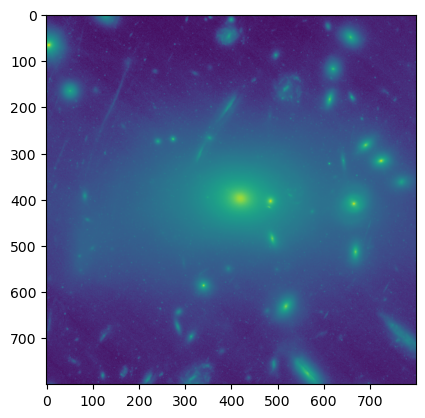

In [19]:
plt.imshow(np.arcsinh(data['bIMG']))

/var/folders/l4/x41n5z4j4q9gypsb58tdh24c0000gn/T/ipykernel_51802/3008184174.py:1: RuntimeWarning: invalid value encountered in log10
  plt.imshow(np.log10(data['bIMG'] + 1))


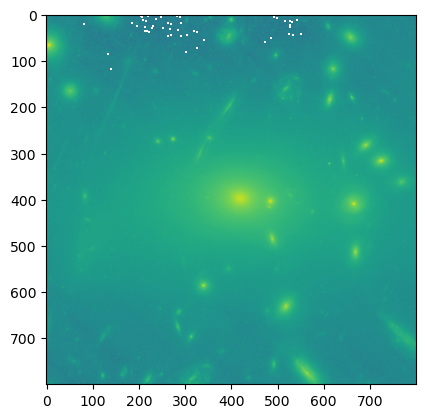

In [20]:
plt.imshow(np.log10(data['bIMG'] + 1))

In [21]:
from astropy.visualization import make_lupton_rgb

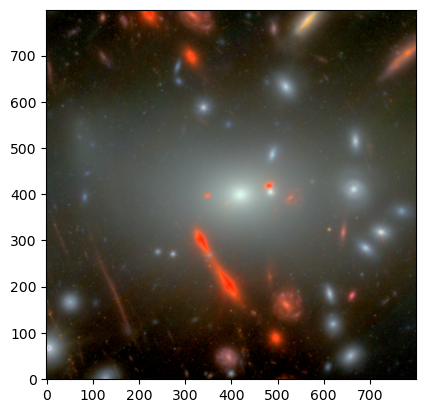

In [22]:
img_rgb = make_lupton_rgb(data['rIMG'], 0.85 * data['gIMG'], 1.1 * data['bIMG'], Q=10, stretch=5)
plt.imshow(img_rgb, origin='lower')